<a href="https://colab.research.google.com/github/neha702/WhatsApp-Chat-Analyzer/blob/main/Whatsapp_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP chat analysis**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
%matplotlib inline

**Detecting if a line starts with date and time format**

In [112]:
def date_time(s):
  pattern='^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-2][0-9]):([0-5][0-9]) -'
  result=re.match(pattern,s)
  if(result):
    return True
  return False


**Detecting author of a particular message**

In [113]:
def authors(s):
  pattern= '^((([\w]+):)|(([\w]+[\s]+[\w]+):)|(([\w]+[\s]+[\w]+[\s]+[\w]+):)|(([+]\d{2} \d{5} \d{5}):))'
  result=re.match(pattern,s)
  if(result):
    return True
  return False

**Extracting tokens**

In [114]:
def extract_tokens(s):
    ans=s.split(' - ')
    date_time=ans[0]
    date,time=date_time.split(', ')
    text=' '.join(ans[1:])
    if authors(text):
     author_msg=text.split(': ')
     author= author_msg[0]
     message=' '.join(author_msg[1:])
    else: 
     author=None 
    return date,time,author,message

**Parsing the entire file**

In [115]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/content/WhatsApp Chat with Buttercups😘 (1).txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file (usually contains information about end-to-end encryption)
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track o the current message being processed
    
    while True:
        line = fp.readline() 
        if not line: # Stop reading further if end of file has been reached
            break
        line = line.strip() # Guarding against erroneous leading and trailing whitespaces
        if date_time(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time,author,message= extract_tokens(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer


**Creating dataframe**

In [116]:
data=pd.DataFrame(parsedData,columns=['Date','Time','Author','Message'])
data.head(20)

,Date,Time,Author,Message
0,16/02/2021,00:03,Sandhani,Eitu praani offline sun
1,16/02/2021,00:03,Sandhani,Call t.ase neki
2,16/02/2021,00:03,Kangkana,busy ase🧐🧐
3,16/02/2021,00:04,Neha Das,O nai
4,16/02/2021,00:04,Neha Das,Prapti e phone korisil😂😂
5,16/02/2021,00:04,Neha Das,Thank you everyone💓💓🤭
6,16/02/2021,00:07,Sandhani,Janisiliue
7,16/02/2021,00:09,Neha Das,Moi hyi aasilu tai phone korute he khar paalu😂😂
8,16/02/2021,00:09,Neha Das,Kali korim dia
9,16/02/2021,00:09,Neha Das,Thank you rey😍😍🤩


In [117]:
data.describe()

,Date,Time,Author,Message
count,317,317,317,317
unique,4,153,4,302
top,16/02/2021,18:59,Neha Das,😂😂
freq,165,9,105,5


**Message counts**

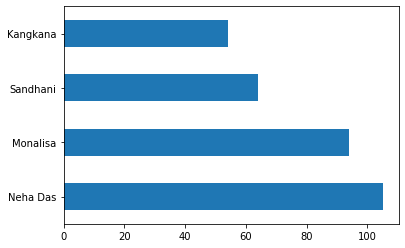

In [118]:
author_media_messages_value_counts = data['Author'].value_counts()
author_media_messages_value_counts.plot.barh()

**Emoji counts**

In [119]:
pip install emoji--upgrade

ERROR: Could not find a version that satisfies the requirement emoji--upgrade (from versions: none)
ERROR: No matching distribution found for emoji--upgrade


In [145]:
import emoji
from collections import Counter

In [154]:
def split_count(text):
    emoji_list = []
    datas = regex.findall(r'[^\w\s,]', text)
    for word in datas:
        if any(char in emoji.UNICODE_EMOJI["en"] for char in word):
            emoji_list.append(word)
    return emoji_list

In [158]:
data['emoji'] =data['Message'].apply(split_count)
emojis = sum(data['emoji'].str.len())
print(emojis) #Total emoji count

199


In [160]:
#Count of each emoji
total_emojis_list = list([a for b in data.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('😂', 70)
('🤣', 39)
('😭', 12)
('\U0001f92d', 10)
('\U0001f97a', 8)
('😅', 6)
('🌚', 6)
('\U0001f929', 5)
('😁', 4)
('\U0001f970', 3)
('\U0001f972', 3)
('\U0001f9d0', 2)
('💓', 2)
('😍', 2)
('❤', 2)
('💕', 2)
('😒', 2)
('😬', 2)
('😕', 2)
('🤧', 1)
('😪', 1)
('😘', 1)
('\U0001f928', 1)
('😐', 1)
('🙄', 1)
('😆', 1)
('✌', 1)
('\U0001f973', 1)
('\U0001f971', 1)
('🙈', 1)
('😮', 1)
('😯', 1)
('🙂', 1)
('🤷', 1)
('🏻', 1)
('♀', 1)
